In [1]:
import sys
sys.path.append('../test/')
from utils import plot_critcaus_srcimgs, pltlkv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import TripleLensing
TRIL = TripleLensing.TripleLensing()

../test/utils.py:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as iax


### calculate the finite source magnification at a single source position

In [2]:
#test/testpymodule.py

#set up lens system
#fractional lens masses: m1, m2, m3
mlens = [0.968738798957637, 0.028093425169771, 0.003167775872591]
#lens positions: x1, y1, x2, y2, x3, y3
zlens = [-0.039343051506317, 0, 1.356656948493683, 0, 0.638936196010800, -0.950873946634155]

#source center
xsCenter = -0.034747426672208
ysCenter = -0.026627816352184
#source radius
rs = 0.005

#parameters controls the accuracy of finite source calculation
secnum = 45 # divide the source bondary into how many parts
basenum = 2 # the number density of sampled dots among each part
quaderr_Tol = 1e-3 # the Quadrupole test tolerance
relerr_Tol = 1e-3 # the relative error tolerance for magnification

#compute the magnification:
mu = TRIL.TriLightCurve(mlens, zlens, [xsCenter], [ysCenter], rs, secnum, basenum, quaderr_Tol, relerr_Tol)
print("finite source magnification: ", mu[0])

finite source magnification:  16.982199446077786


### plot caustics and critical curve

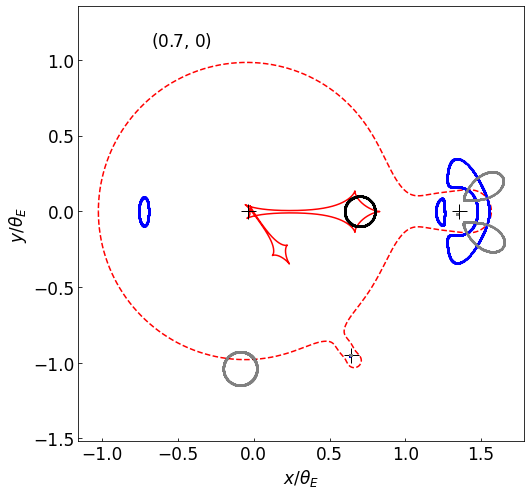

In [3]:
xsCenter, ysCenter = 0.7, 0
rs = 0.1
plot_critcaus_srcimgs(mlens, zlens, xsCenter, ysCenter, rs)
plt.show()
# in the following plot, the black circur is the source boundary, 
# blue dots shows the lensed images of the source boundary
# grey dots are false images originate from the corresponding tenth order polynomial of the triple lens equation

In [4]:
# we can also calculate the caustics and critical curve separately
resxy = TRIL.outputCriticalTriple_list(mlens, zlens[::2] + zlens[1::2], len(mlens), 2000)
critical = []
caustics = []
numcrit = int(resxy[0])
for i in range(numcrit):
    critical.append( [ resxy[2*i+1], resxy[2*i+2] ] )
offset = 2*numcrit + 1
numcaus = int( resxy[offset] )
for i in range(numcaus):
    caustics.append([resxy[offset+2*i+1],resxy[offset+2*i+2]])
causx = np.array([xy[0]for xy in caustics])
causy = np.array([xy[1]for xy in caustics])
criticalx = [xy[0]for xy in critical]
criticaly = [xy[1]for xy in critical]

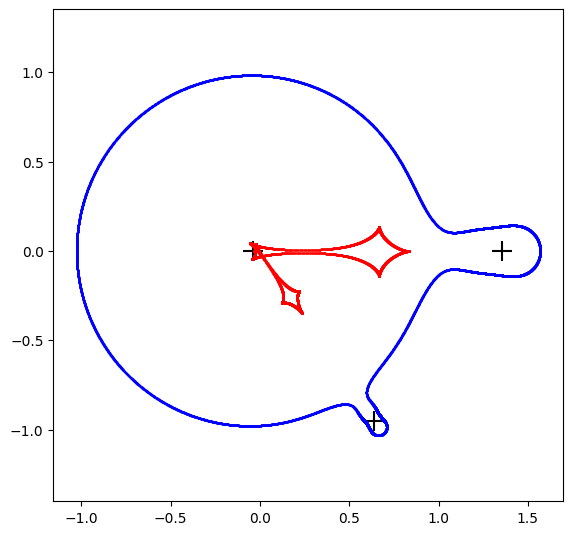

In [5]:
f = plt.figure(figsize=(6,6),dpi=100)
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])
plt.subplots_adjust(top = 0.9, bottom = 0.08, right = 0.95, left = 0.1, hspace = 0.1, wspace = 0.2)

# plot lens position
for i in range(3):
    ax.scatter(zlens[i*2], zlens[i*2+1], marker = "+",s = 200, color = "k")

ax.scatter(causx,causy, marker='.', s= 1,color='r')
ax.scatter(criticalx,criticaly, marker='.', s= 1,color='b')
ax.axis("equal");

### light curve calculation

generating light curve ...


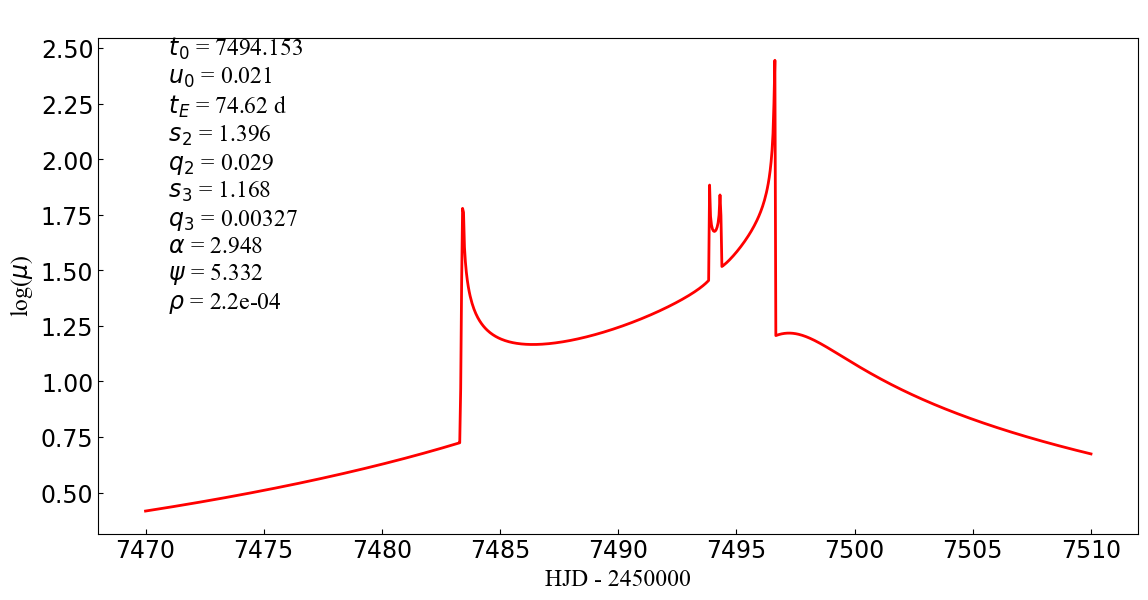

In [6]:
# triple lens event parameters
t0 = 7494.153;
u0 = 0.021;
tE = 74.62;
s2 = 1.396;
q2 = 0.029;
alpha = 2.948; #//rad
s3 = 1.168;
q3 = 3.27e-3;
psi = 5.332; #//rad
rs = 0.22e-3
salpha = np.sin(alpha)
calpha = np.cos(alpha)
params = [t0, u0, tE, s2, q2, alpha, s3, q3, psi, rs]
# source position
ts = np.linspace(7470, 7510, 1000)
tn = (ts - t0) / tE;
y1s = u0 * salpha + tn * calpha; # source positions
y2s = u0 * calpha - tn * salpha;

# computing light curve
print("generating light curve ...")
# for small source radius like here, we can actuarlly use quaderr_Tol = 1e-1 or larger 
mus = TRIL.TriLightCurve(mlens, zlens, y1s, y2s, rs, secnum, basenum, quaderr_Tol, relerr_Tol)
main, gs = pltlkv(ts, mus, params, label = "Without limb-darkening")
plt.show()

### with limb darkening

In [16]:
Gamma = 0.51 # Gamma coefficient of the linear limb-darkening profile
u = 3. * Gamma / (2. + Gamma) # gamma_to_u(Gamma)
# parameters controls the accuracy of limb-darkening calculation
RelTolLimb, AbsTolLimb = 1e-2, 1e-2

# source position
ts = np.linspace(7480, 7500, 100)
tn = (ts - t0) / tE;
y1s = u0 * salpha + tn * calpha;
y2s = u0 * calpha - tn * salpha;
rs = 0.005 # use a larger source radius to see the limb-darkening effect
params[9] = rs

In [17]:
print("generating light curve ...")
mus = TRIL.TriLightCurve(mlens, zlens, y1s, y2s, rs, secnum, basenum, quaderr_Tol, relerr_Tol)

generating light curve ...


In [18]:
print("generating light curve with limb-darkening ...")
musLimb = TRIL.TriLightCurveLimb(mlens, zlens, y1s, y2s, rs, secnum, basenum, quaderr_Tol, relerr_Tol, RelTolLimb, AbsTolLimb, u)
#np.savez("../doc/demolkvs", ts=np.array(ts), muslimb=np.array(musLimb), musnolimb = np.array(mus))

generating light curve with limb-darkening ...


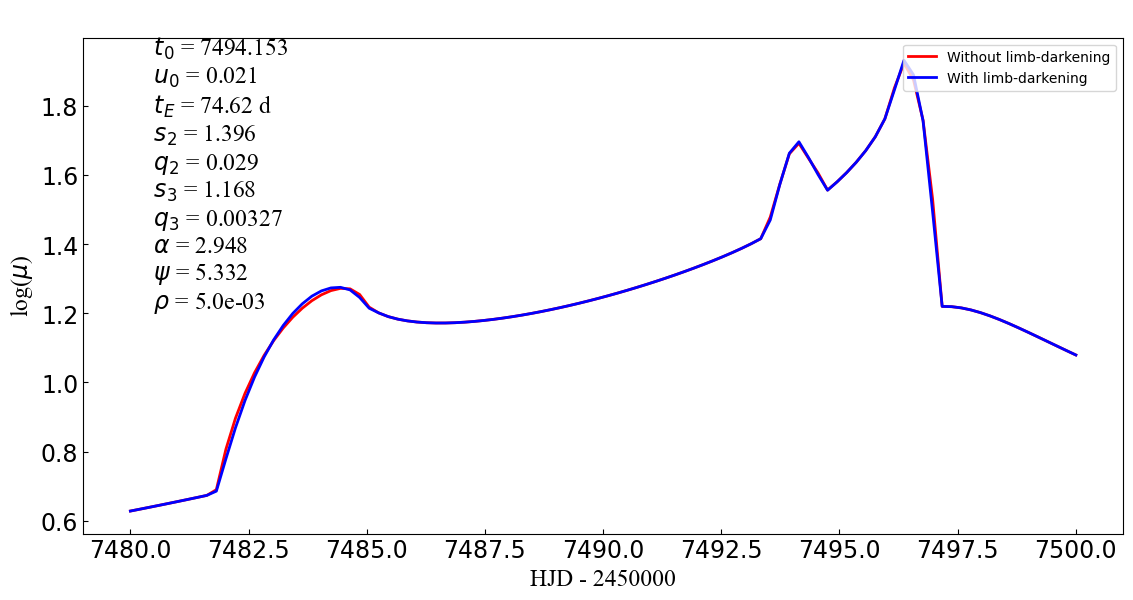

In [19]:
main, gs = pltlkv(ts, mus, params, label = "Without limb-darkening")
main.plot(ts, np.log10( musLimb ), color="b",linewidth = 2, label = "With limb-darkening")
plt.legend(loc = "upper right")
plt.show()